## POS tagging using modified Viterbi

#### <font color = VIOLET size = 5 > Problem Statement :</font>

- Need to handle POS Tagging for Unknown words by Modifying the Viterbi algorithm with at least two techniques. 


### <font color = BROWN size = 4> Solution Approach : </font>


1. Plain Vanila Viterbi Model
    - 1.1 Evaluating the tagging accuracy on validation set
    - 1.2 Identifying the incorrectly tagged words
    - 1.3 Identifying the unknown words tagging
    - 1.4 Evaluating the tagging accuracy on test set
        
2. Assigning frequently occuring Tag for unknown words with Viterbi Model
    - 2.1 Evaluating the validation set
    - 2.2 Identifying the incorrect Tagged words
    - 2.3 Evaluating the tagging accuracy on test set
    
3. Probability Technique(using transition probability for unknown words) with Viterbi Model
    - 3.1 Evaluating the validation set
    - 3.2 Identifying the incorrect Tagged words
    - 3.3 Evaluating the tagging accuracy on test set

4. Rule Based Technique with Viterbi Model
    - 4.1 Evaluating the validation set
    - 4.2 Identifying the incorrect Tagged words
    - 4.3 Evaluating the tagging accuracy on test set
    
5. Comparing accuracy for all the four models on the validation set

6. Comparision of incorrectly tagged by original POS tagger vs which are got corrected by your modifications


### Import the required libraries

In [522]:
#Importing libraries
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pprint,time
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from collections import Counter

### Download Universal tag set and Data analysis and Preparation

In [457]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\sunan\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

#### Read the treebank tagged sentences

In [458]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))
print("Total tagged sentences - " , str(len(nltk_data)))

Total tagged sentences -  3914


#### Split the data to train and test sets

In [459]:
random.seed(97)

nltk_train_set, nltk_test_set = train_test_split(nltk_data,test_size=0.05,random_state=97)
print("Train set sentences - " , str(len(nltk_train_set)))
print("Test set sentences - " ,len(nltk_test_set))

Train set sentences -  3718
Test set sentences -  196


In [460]:
# Getting list of tagged words from train set
nltk_train_tagged_words = [tup for sent in nltk_train_set for tup in sent]
len(nltk_train_tagged_words)

95565

In [461]:
# Getting list of tagged words from test set
nltk_test_tagged_words = [tup for sent in nltk_test_set for tup in sent]
(nltk_test_tagged_words)

[('The', 'DET'),
 ('Democrat', 'NOUN'),
 ("'s", 'PRT'),
 ('proposal', 'NOUN'),
 ('is', 'VERB'),
 ('described', 'VERB'),
 ('*-1', 'X'),
 ('by', 'ADP'),
 ('government', 'NOUN'),
 ('sources', 'NOUN'),
 ('and', 'CONJ'),
 ('lobbyists', 'NOUN'),
 ('as', 'ADV'),
 ('significantly', 'ADV'),
 ('weaker', 'ADJ'),
 ('than', 'ADP'),
 ('the', 'DET'),
 ('president', 'NOUN'),
 ("'s", 'PRT'),
 ('plan', 'NOUN'),
 ('*', 'X'),
 ('to', 'PRT'),
 ('cut', 'VERB'),
 ('utility', 'NOUN'),
 ('emissions', 'NOUN'),
 ('.', '.'),
 ('Many', 'ADJ'),
 ('people', 'NOUN'),
 (',', '.'),
 ('including', 'VERB'),
 ('the', 'DET'),
 ('Big', 'NOUN'),
 ('Board', 'NOUN'),
 (',', '.'),
 ('think', 'VERB'),
 ('that', 'ADP'),
 ('it', 'PRON'),
 ("'s", 'VERB'),
 ('too', 'ADV'),
 ('late', 'ADJ'),
 ('*', 'X'),
 ('to', 'PRT'),
 ('put', 'VERB'),
 ('the', 'DET'),
 ('genie', 'NOUN'),
 ('back', 'ADV'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('bottle', 'NOUN'),
 ('.', '.'),
 ('A', 'DET'),
 ('licensing', 'NOUN'),
 ('company', 'NOUN'),
 ('representing'

In [462]:
# tokens from train set
tokens = [pair[0] for pair in nltk_train_tagged_words]
tokens[:10]

['Mr.',
 'Dahl',
 ',',
 'a',
 'registered',
 'representative',
 'in',
 'the',
 'insurance',
 'business']

In [463]:
# Unique Tokens - vocabulary
V = set(tokens)
print("Number of unique tokens in train set - ",len(V))

Number of unique tokens in train set -  12064


In [464]:
# number of unique tags in train set
T = set([pair[1] for pair in nltk_train_tagged_words])
print("Unique tags in train set - ",len(T))

Unique tags in train set -  12


In [465]:
print(T)

{'NOUN', 'DET', 'ADV', 'NUM', 'X', 'PRON', 'VERB', 'ADP', 'CONJ', 'PRT', 'ADJ', '.'}


In [466]:
# computing P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [467]:
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = nltk_train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)



In [468]:
#Transition Probabilities
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = nltk_train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [469]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
tags_matrix[:10]

array([[2.62911320e-01, 1.29204644e-02, 1.71662830e-02, 9.69949830e-03,
        2.91350968e-02, 4.72164247e-03, 1.47542179e-01, 1.76311269e-01,
        4.29340079e-02, 4.40320633e-02, 1.22250281e-02, 2.40401164e-01],
       [6.36385679e-01, 5.57913864e-03, 1.26137054e-02, 2.23165546e-02,
        4.58459668e-02, 3.39599769e-03, 3.94178294e-02, 9.46027879e-03,
        4.85142518e-04, 1.21285630e-04, 2.06549421e-01, 1.78289879e-02],
       [3.14465426e-02, 6.85203597e-02, 8.04369450e-02, 3.11155245e-02,
        2.35021524e-02, 1.52267460e-02, 3.45249921e-01, 1.17841773e-01,
        7.28235673e-03, 1.45647135e-02, 1.29758358e-01, 1.35054618e-01],
       [3.53183955e-01, 3.24292458e-03, 2.65330193e-03, 1.84257075e-01,
        2.09610850e-01, 1.47405663e-03, 1.76886786e-02, 3.44929248e-02,
        1.38561325e-02, 2.68278308e-02, 3.39033008e-02, 1.18808962e-01],
       [6.24205843e-02, 5.43202050e-02, 2.62071155e-02, 2.85895797e-03,
        7.49682337e-02, 5.65438382e-02, 2.03303680e-01, 1.43

In [470]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))
tags_df

,NOUN,DET,ADV,NUM,X,PRON,VERB,ADP,CONJ,PRT,ADJ,.
NOUN,0.262911,0.012920,0.017166,0.009699,0.029135,0.004722,0.147542,0.176311,0.042934,0.044032,0.012225,0.240401
DET,0.636386,0.005579,0.012614,0.022317,0.045846,0.003396,0.039418,0.009460,0.000485,0.000121,0.206549,0.017829
ADV,0.031447,0.068520,0.080437,0.031116,0.023502,0.015227,0.345250,0.117842,0.007282,0.014565,0.129758,0.135055
NUM,0.353184,0.003243,0.002653,0.184257,0.209611,0.001474,0.017689,0.034493,0.013856,0.026828,0.033903,0.118809
X,0.062421,0.054320,0.026207,0.002859,0.074968,0.056544,0.203304,0.143266,0.010006,0.184562,0.016836,0.164708
PRON,0.208110,0.009564,0.034813,0.007269,0.092961,0.008034,0.486228,0.022571,0.005356,0.012242,0.073068,0.039786
VERB,0.110448,0.133855,0.081305,0.022787,0.218183,0.035653,0.169509,0.091614,0.005348,0.031623,0.064564,0.035111
ADP,0.321295,0.323331,0.013503,0.063230,0.034723,0.068803,0.008038,0.017254,0.000857,0.001500,0.107598,0.039867
CONJ,0.346939,0.120130,0.055659,0.041280,0.007885,0.059369,0.156772,0.053340,0.000464,0.005102,0.117811,0.035250
PRT,0.247551,0.097975,0.010124,0.057805,0.013390,0.017636,0.401698,0.021228,0.002286,0.001960,0.085238,0.043109


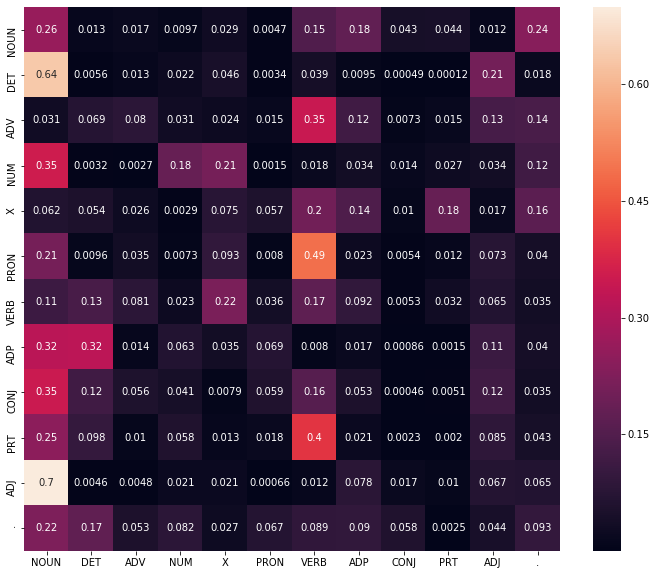

In [471]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(12, 10))
sns.heatmap(tags_df,annot=True)
plt.show()

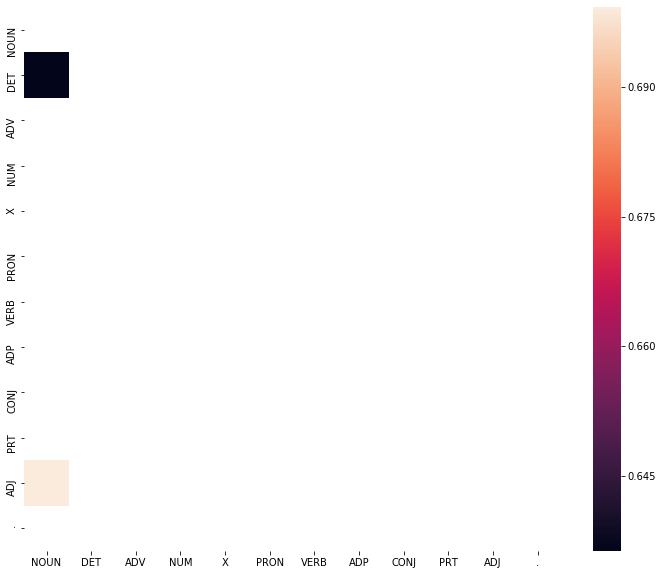

In [472]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(12, 10))
sns.heatmap(tags_frequent)
plt.show()

### Build the vanilla Viterbi based POS tagger

In [473]:
# Viterbi Heuristic
def Viterbi(words, train_bag = nltk_train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))



In [474]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset

random.seed(42)


# list of tagged words
nltk_test_run_base = [tup for sent in nltk_test_set for tup in sent]

# list of untagged words
nltk_test_tagged_words = [tup[0] for sent in nltk_test_set for tup in sent]
nltk_test_run_base
print(nltk_train_tagged_words)

[('Mr.', 'NOUN'), ('Dahl', 'NOUN'), (',', '.'), ('a', 'DET'), ('registered', 'VERB'), ('representative', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('insurance', 'NOUN'), ('business', 'NOUN'), (',', '.'), ('said', 'VERB'), ('0', 'X'), ('he', 'PRON'), ('``', '.'), ('screwed', 'VERB'), ('up', 'PRT'), ("''", '.'), ('because', 'ADP'), ('he', 'PRON'), ('did', 'VERB'), ("n't", 'ADV'), ('realize', 'VERB'), ('0', 'X'), ('he', 'PRON'), ('was', 'VERB'), ('breaking', 'VERB'), ('securities', 'NOUN'), ('laws', 'NOUN'), ('.', '.'), ('Under', 'ADP'), ('the', 'DET'), ('measure', 'NOUN'), ('passed', 'VERB'), ('*', 'X'), ('yesterday', 'NOUN'), (',', '.'), ('the', 'DET'), ('minimum', 'ADJ'), ('wage', 'NOUN'), ('would', 'VERB'), ('rise', 'VERB'), ('to', 'PRT'), ('$', '.'), ('3.80', 'NUM'), ('*U*', 'X'), ('next', 'ADJ'), ('April', 'NOUN'), ('.', '.'), ('The', 'DET'), ('Illinois', 'NOUN'), ('Supreme', 'NOUN'), ('Court', 'NOUN'), ('ordered', 'VERB'), ('the', 'DET'), ('commission', 'NOUN'), ('*-1', 'X'), ('to', 

In [475]:
# tagging the test sentences
start = time.time()
nltk_tagged_seq = Viterbi(nltk_test_tagged_words)
end = time.time()
difference = end-start

In [476]:
print("Time taken in seconds: ", difference)
print(nltk_tagged_seq)
#print(test_run_base)

Time taken in seconds:  2605.033255338669
[('The', 'DET'), ('Democrat', 'NOUN'), ("'s", 'PRT'), ('proposal', 'NOUN'), ('is', 'VERB'), ('described', 'VERB'), ('*-1', 'X'), ('by', 'ADP'), ('government', 'NOUN'), ('sources', 'NOUN'), ('and', 'CONJ'), ('lobbyists', 'NOUN'), ('as', 'ADP'), ('significantly', 'ADV'), ('weaker', 'ADJ'), ('than', 'ADP'), ('the', 'DET'), ('president', 'NOUN'), ("'s", 'PRT'), ('plan', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('cut', 'VERB'), ('utility', 'NOUN'), ('emissions', 'NOUN'), ('.', '.'), ('Many', 'ADJ'), ('people', 'NOUN'), (',', '.'), ('including', 'VERB'), ('the', 'DET'), ('Big', 'NOUN'), ('Board', 'NOUN'), (',', '.'), ('think', 'VERB'), ('that', 'ADP'), ('it', 'PRON'), ("'s", 'VERB'), ('too', 'ADV'), ('late', 'ADJ'), ('*', 'X'), ('to', 'PRT'), ('put', 'VERB'), ('the', 'DET'), ('genie', 'NOUN'), ('back', 'PRT'), ('in', 'ADP'), ('the', 'DET'), ('bottle', 'NOUN'), ('.', '.'), ('A', 'DET'), ('licensing', 'NOUN'), ('company', 'NOUN'), ('representing', 'VERB'), 

In [477]:
# accuracy
check = [i for i, j in zip(nltk_tagged_seq, nltk_test_run_base) if i == j] 
print(check) 
print(len(check))
#print((nltk_tagged_seq))
print(list(zip(nltk_tagged_seq, nltk_test_run_base)))
val_accuracy = len(check)/len(nltk_tagged_seq)

val_accuracy

[('The', 'DET'), ('Democrat', 'NOUN'), ("'s", 'PRT'), ('proposal', 'NOUN'), ('is', 'VERB'), ('described', 'VERB'), ('*-1', 'X'), ('by', 'ADP'), ('government', 'NOUN'), ('sources', 'NOUN'), ('and', 'CONJ'), ('lobbyists', 'NOUN'), ('significantly', 'ADV'), ('weaker', 'ADJ'), ('than', 'ADP'), ('the', 'DET'), ('president', 'NOUN'), ("'s", 'PRT'), ('plan', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('cut', 'VERB'), ('utility', 'NOUN'), ('emissions', 'NOUN'), ('.', '.'), ('Many', 'ADJ'), ('people', 'NOUN'), (',', '.'), ('including', 'VERB'), ('the', 'DET'), ('Big', 'NOUN'), ('Board', 'NOUN'), (',', '.'), ('think', 'VERB'), ('that', 'ADP'), ('it', 'PRON'), ("'s", 'VERB'), ('too', 'ADV'), ('late', 'ADJ'), ('*', 'X'), ('to', 'PRT'), ('put', 'VERB'), ('the', 'DET'), ('genie', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('bottle', 'NOUN'), ('.', '.'), ('A', 'DET'), ('licensing', 'NOUN'), ('company', 'NOUN'), ('representing', 'VERB'), ('the', 'DET'), ('University', 'NOUN'), ('of', 'ADP'), ('Pennsylvania', 'N

0.9389551946781451

In [478]:
nltk_incorrect_tagged_cases = [[nltk_test_run_base[i-1],j] for i, j in enumerate(zip(nltk_tagged_seq, nltk_test_run_base)) if j[0]!=j[1]]
nltk_incorrect_tagged_cases[:20]
print(len(nltk_incorrect_tagged_cases))

312


In [479]:
#Unknown words in test set
nltk_train_words=[pair[0] for pair in nltk_train_tagged_words]
nltk_train_vocab = set(nltk_train_words)
nltk_test_words=[pair for pair in nltk_test_tagged_words]
nltk_test_vocab = set(nltk_test_words)
nltk_unknown_words=nltk_test_vocab-nltk_train_vocab
print("Length of vocabulary for train set: ",len(nltk_train_vocab))
print("Length of vocabulary for test set: ",len(nltk_test_vocab))
print(len(nltk_unknown_words))

Length of vocabulary for train set:  12064
Length of vocabulary for test set:  1951
344


In [480]:
test_text="Android is a mobile operating system developed by Google.Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.Twitter is an online news and social networking service on which users post and interact with messages known as tweets.Before entering politics, Donald Trump was a domineering businessman and a television personality.The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.Show me the cheapest round trips from Dallas to Atlanta.I would like to see flights from Denver to Philadelphia.Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.NASA invited social media users to experience the launch of ICESAT-2 Satellite."

In [481]:
test_words=word_tokenize(test_text)
print(len(test_words))
print(test_words)

# Tagging using nltk_pos_tag
test_words_tagged= nltk.pos_tag(test_words,tagset='universal')

162
['Android', 'is', 'a', 'mobile', 'operating', 'system', 'developed', 'by', 'Google.Android', 'has', 'been', 'the', 'best-selling', 'OS', 'worldwide', 'on', 'smartphones', 'since', '2011', 'and', 'on', 'tablets', 'since', '2013.Google', 'and', 'Twitter', 'made', 'a', 'deal', 'in', '2015', 'that', 'gave', 'Google', 'access', 'to', 'Twitter', "'s", 'firehose.Twitter', 'is', 'an', 'online', 'news', 'and', 'social', 'networking', 'service', 'on', 'which', 'users', 'post', 'and', 'interact', 'with', 'messages', 'known', 'as', 'tweets.Before', 'entering', 'politics', ',', 'Donald', 'Trump', 'was', 'a', 'domineering', 'businessman', 'and', 'a', 'television', 'personality.The', '2018', 'FIFA', 'World', 'Cup', 'is', 'the', '21st', 'FIFA', 'World', 'Cup', ',', 'an', 'international', 'football', 'tournament', 'contested', 'once', 'every', 'four', 'years.This', 'is', 'the', 'first', 'World', 'Cup', 'to', 'be', 'held', 'in', 'Eastern', 'Europe', 'and', 'the', '11th', 'time', 'that', 'it', 'has',

In [482]:
start = time.time()
test_tagged_seq = Viterbi(test_words)
end = time.time()
difference = end-start
print(difference)
print(test_tagged_seq[:10])

80.62707376480103
[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google.Android', 'NOUN'), ('has', 'VERB')]


In [483]:
# accuracy
check = [i for i, j in zip(test_tagged_seq, test_words_tagged) if i == j] 
print(check)

test_accuracy = len(check)/len(test_tagged_seq)

print(len(test_tagged_seq))
print(len(test_words_tagged))

test_accuracy

[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google.Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'NOUN'), ('since', 'ADP'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('gave', 'VERB'), ('Google', 'NOUN'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'NOUN'), ("'s", 'PRT'), ('firehose.Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), ('which', 'DET'), ('users', 'NOUN'), ('post', 'NOUN'), ('and', 'CONJ'), ('interact', 'NOUN'), ('with', 'ADP'), ('messages', 'NOUN'), ('known', 'VERB'), ('as', 'ADP'), ('tweets.Before', 'NOU

0.9074074074074074

In [484]:
incorrect_tagged_cases = [i for i, j in zip(test_tagged_seq, test_words_tagged) if j[0] != j[1]] 
print(len(incorrect_tagged_cases))

161


In [485]:

results = pd.DataFrame({'Method':['Vanilla Viterbi'], 'Validation_Accuracy': [val_accuracy],'Test_Accuracy': [test_accuracy],'Number of Incorrect Tagged Words': len(nltk_incorrect_tagged_cases) })
results

,Method,Validation_Accuracy,Test_Accuracy,Number of Incorrect Tagged Words
0,Vanilla Viterbi,0.938955,0.907407,312


### Solve the problem of unknown words

### Approach 1 - Rule based modification is Viterbi

In [486]:
# Defining the patterns using regular expression and tag based on these rules
patterns =[
    (r'^([0-9]|[aA-zZ])+\-([0-9]|[aA-zZ])*$','ADJ'), # words such as '10-lap','30-day','York-based'
    (r'.*able$', 'ADJ'),                     # words ending with 'able' such as 'questionable'
    (r'.*ful$', 'ADJ'),                      # words ending with 'ful' such as 'useful'
    (r'.*ous$', 'ADJ'),                      # words ending with 'ous' such as 'Previous'
    
    (r'.*\'s$', 'NOUN'),                     # possessive nouns
    (r'.*s$', 'NOUN'),                       # plural nouns
    (r'^[aA-zZ].*[0-9]+','NOUN'),            # Alpha Numeric such as Door Number, Street Number etc
    (r'.*ers$', 'NOUN'),                     # words ending with 'ers' such as 'filters','workers'
    (r'.*ment$', 'NOUN'),                    # words ending with 'ment' such as 'reinvestment' 
    (r'.*town$', 'NOUN'),                    # words ending with 'town' such as 'town','downtown'  
    (r'.*ness$', 'NOUN'),                    # words ending with 'ness' such as 'sluggishness' 
    (r'^[A-Z]+([a-z]{1,2})?\.?$','NOUN'),    # words such as 'Nov.','Mr.','Inc.'
    
    (r'[aA-zZ]+(ed|ing|es)$', 'VERB'),       # words ending with 'ed' or 'ing' or 'es'    
    (r'.*ly$', 'ADV'),                       # words ending with 'ly'
    
    (r'^[0-9]+(.[0-9]+)?$', 'NUM'),          # cardinal numbers such as 61, 1956, 9.8, 8.45, 352.7        
    (r'^(0|([*|-|$].*))','X'),               # words such as '*', '0', *-1', '*T*-1', '*ICH*-1', '*?*'   
    
    (r'(The|the|A|a|An|an|That|that|This|this|Those|those|These|these)$', 'DET'), # determinants     
    (r'.*', 'NOUN')  
    ]
# rule based tagger
rule_based_tagger = nltk.RegexpTagger(patterns)

In [488]:
#modified Viterbi to include rule based tagger in it
def rule_based_Viterbi(words, train_bag = nltk_train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        state_max = T[p.index(pmax)] 
        
        # modified algorithm         
        
        if(pmax==0):
            state_max = rule_based_tagger.tag([word])[0][1] # assign based on rule based tagger
        else:
            if state_max != 'X':
                # getting state for which probability is maximum
                state_max = T[p.index(pmax)]                
            
        
        state.append(state_max)
    return list(zip(words, state))

In [489]:
# tagging the test sentences
start = time.time()
tagged_seq = rule_based_Viterbi(nltk_test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)
print("Tagged Sequences (first 10):\n",'\n',tagged_seq[:10],'\n')



Time taken in seconds:  2412.5531730651855
Tagged Sequences (first 10):
 
 [('The', 'DET'), ('Democrat', 'NOUN'), ("'s", 'PRT'), ('proposal', 'NOUN'), ('is', 'VERB'), ('described', 'VERB'), ('*-1', 'X'), ('by', 'ADP'), ('government', 'NOUN'), ('sources', 'NOUN')] 



In [490]:
# accuracy
check = [i for i, j in zip(tagged_seq, nltk_test_run_base) if i == j]
val_accuracy_rule_based = len(check)/len(tagged_seq)
print("Validation set accuracy from Rule based modified Viterbi: ",val_accuracy_rule_based)


Validation set accuracy from Rule based modified Viterbi:  0.9585208374095089


In [491]:
incorrect_tagged_cases1 = [[nltk_test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, nltk_test_run_base)) if j[0]!=j[1]]
incorrect_tagged_cases1[:20]

[[('lobbyists', 'NOUN'), (('as', 'ADP'), ('as', 'ADV'))],
 [('genie', 'NOUN'), (('back', 'PRT'), ('back', 'ADV'))],
 [('A', 'DET'), (('licensing', 'VERB'), ('licensing', 'NOUN'))],
 [('to', 'PRT'), (('contest', 'NOUN'), ('contest', 'VERB'))],
 [('days', 'NOUN'), (('picks', 'NOUN'), ('picks', 'VERB'))],
 [('Jefferson', 'NOUN'), (('dissolves', 'NOUN'), ('dissolves', 'VERB'))],
 [('take', 'VERB'), (('away', 'ADV'), ('away', 'PRT'))],
 [('his', 'PRON'), (('finest', 'NOUN'), ('finest', 'ADJ'))],
 [('Moody', 'NOUN'), (("'s", 'PRT'), ("'s", 'VERB'))],
 [('move', 'NOUN'), (('that', 'ADP'), ('that', 'DET'))],
 [('and', 'CONJ'), (('signal', 'NOUN'), ('signal', 'VERB'))],
 [('To', 'PRT'), (('further', 'ADJ'), ('further', 'ADV'))],
 [('further', 'ADV'), (('load', 'NOUN'), ('load', 'VERB'))],
 [('dreamed', 'VERB'), (('up', 'ADV'), ('up', 'PRT'))],
 [('.', '.'), (('Weatherly', 'ADV'), ('Weatherly', 'NOUN'))],
 [('*-1', 'X'), (('marketing', 'NOUN'), ('marketing', 'VERB'))],
 [('network', 'NOUN'), (('

In [492]:
print("length of incorrect tagged words from rule based Viterbi model : ",len(incorrect_tagged_cases1))

length of incorrect tagged words from rule based Viterbi model :  212


In [493]:
start = time.time()
test_tagged_seq_rule = rule_based_Viterbi(test_words)
end = time.time()
difference = end-start
print("Time taken in seconds : ",difference)
print("First 10 tagged sequences from test Rule based Viterbi : ",test_tagged_seq_rule[:10])

Time taken in seconds :  68.86621332168579
First 10 tagged sequences from test Rule based Viterbi :  [('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google.Android', 'NOUN'), ('has', 'VERB')]


In [494]:
# accuracy
check = [i for i, j in zip(test_tagged_seq_rule, test_words_tagged) if i == j]
test_accuracy_rule_based = len(check)/len(test_tagged_seq_rule)
print("Test set accuracy from Rule based Viterbi model: ",test_accuracy_rule_based)

Test set accuracy from Rule based Viterbi model:  0.9259259259259259


In [495]:
incorrect_tagged_cases_test1 = [[test_tagged_words[i-1],j] for i, j in enumerate(zip(test_tagged_seq_rule, test_tagged_words)) if j[0]!=j[1]]
incorrect_tagged_cases_test1[:20]

[[('.', '.'), (('Android', 'NOUN'), ('For', 'ADP'))],
 [('For', 'ADP'), (('is', 'VERB'), ('the', 'DET'))],
 [('the', 'DET'), (('a', 'DET'), ('Agency', 'NOUN'))],
 [('Agency', 'NOUN'), (('mobile', 'ADJ'), ('for', 'ADP'))],
 [('for', 'ADP'), (('operating', 'NOUN'), ('International', 'NOUN'))],
 [('International', 'NOUN'), (('system', 'NOUN'), ('Development', 'NOUN'))],
 [('Development', 'NOUN'), (('developed', 'VERB'), (',', '.'))],
 [(',', '.'), (('by', 'ADP'), ('appropriators', 'NOUN'))],
 [('appropriators', 'NOUN'),
  (('Google.Android', 'NOUN'), ('approved', 'VERB'))],
 [('approved', 'VERB'), (('has', 'VERB'), ('$', '.'))],
 [('$', '.'), (('been', 'VERB'), ('200', 'NUM'))],
 [('200', 'NUM'), (('the', 'DET'), ('million', 'NUM'))],
 [('million', 'NUM'), (('best-selling', 'ADJ'), ('*U*', 'X'))],
 [('*U*', 'X'), (('OS', 'NOUN'), ('in', 'ADP'))],
 [('in', 'ADP'), (('worldwide', 'NOUN'), ('secondary', 'ADJ'))],
 [('secondary', 'ADJ'), (('on', 'ADP'), ('loan', 'NOUN'))],
 [('loan', 'NOUN'),

In [496]:
tempResults = pd.DataFrame({'Method':['Rule based Viterbi'], 'Validation_Accuracy': [val_accuracy_rule_based],'Test_Accuracy': [test_accuracy_rule_based],'Number of Incorrect Tagged Words': len(incorrect_tagged_cases1) })
results = pd.concat([results, tempResults])
results

,Method,Validation_Accuracy,Test_Accuracy,Number of Incorrect Tagged Words
0,Vanilla Viterbi,0.938955,0.907407,312
0,Rule based Viterbi,0.958521,0.925926,212


### Approach 2: Probabilistic method:

If the word-tag pair is not found in the dataset, Vanilla Viterbi will yield the emission probability as ZERO

By considering only transition probability, we can smoothe out these ZERO values

#### Step: 3 Probabilistic Method

In [497]:
# Modified Viterbi Heuristic- By considering only transition probability
def Prob_Viterbi(words, train_bag =  nltk_train_tagged_words):
    state = []
    
    # Take the list of unique tags present in the corpus
    T = sorted(list(set([pair[1] for pair in train_bag])))
    V = [i[0] for i in train_bag]
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        
        for tag in T:
            if key == 0: #first word has key=0
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            
            
            # modification to the original vanilla viterbi algorithm. 
            # Vocab contains the list of unique words in training dataset
            if word in V: 
                state_probability = emission_p * transition_p
                
            else:
                state_probability = transition_p
                print('in else')
                
            p.append(state_probability)
            
        pmax = max(p)
        
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
        
    return list(zip(words, state))


#### 3.1 Evaluating tagging accuracy on validation set

In [498]:
# tagging the test sentences
start = time.time()
tagged_seq_prob = Prob_Viterbi(nltk_test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)
print("Tagged Sequences( first 10) from Probablistic model:\n",'\n',tagged_seq_prob[:10])




in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else


in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else


in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else


in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else


in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
Time taken in seconds:  2225.3948028087616
Tagged Sequences( first 10) from Probablistic model:
 
 [('The', 'DET'), ('Democrat', 'NOUN'), ("'s", 'PRT'), ('proposal', 'NOUN'), ('is', 'VERB'), ('described', 'VERB'), ('

In [499]:
# accuracy
check = [i for i, j in zip(tagged_seq_prob, nltk_test_run_base) if i == j]
val_accuracy_prob = len(check)/len(tagged_seq_prob)
print("Validation set accuracy from Probabilistic viterbi model: ",val_accuracy_prob)


Validation set accuracy from Probabilistic viterbi model:  0.9391508511054588


In [500]:
# Viterbi Modification -3: state probability is dependent only on transition probability
def Viterbi_modf3(words, train_bag = nltk_train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            
            if word in V:
                state_probability = transition_p * emission_p              
            else:
                state_probability = transition_p
            
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
        
    return list(zip(words, state))

In [501]:
incorrect_tagged_cases2 = [[nltk_test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_prob, nltk_test_run_base)) if j[0]!=j[1]]
incorrect_tagged_cases2[:20]

[[('lobbyists', 'NOUN'), (('as', 'ADP'), ('as', 'ADV'))],
 [('genie', 'NOUN'), (('back', 'PRT'), ('back', 'ADV'))],
 [('lawsuit', 'NOUN'), (('challenging', 'NOUN'), ('challenging', 'VERB'))],
 [('the', 'DET'), (('band-wagon', 'NOUN'), ('band-wagon', 'ADJ'))],
 [('days', 'NOUN'), (('picks', 'NOUN'), ('picks', 'VERB'))],
 [('Jefferson', 'NOUN'), (('dissolves', 'NOUN'), ('dissolves', 'VERB'))],
 [('take', 'VERB'), (('away', 'ADV'), ('away', 'PRT'))],
 [('his', 'PRON'), (('finest', 'VERB'), ('finest', 'ADJ'))],
 [('Moody', 'NOUN'), (("'s", 'PRT'), ("'s", 'VERB'))],
 [('move', 'NOUN'), (('that', 'ADP'), ('that', 'DET'))],
 [('its', 'PRON'), (('borrowings', 'VERB'), ('borrowings', 'NOUN'))],
 [('and', 'CONJ'), (('signal', 'NOUN'), ('signal', 'VERB'))],
 [('To', 'PRT'), (('further', 'ADJ'), ('further', 'ADV'))],
 [('further', 'ADV'), (('load', 'NOUN'), ('load', 'VERB'))],
 [('Lane', 'NOUN'), (('dreamed', 'NOUN'), ('dreamed', 'VERB'))],
 [('highly', 'ADV'), (('improbable', 'VERB'), ('improbabl

In [502]:
print("Number of incorrect tagged words from Probablistic model : ",len(incorrect_tagged_cases2))

Number of incorrect tagged words from Probablistic model :  311


In [503]:
start = time.time()
test_tagged_seq_prob = Prob_Viterbi(test_words)
#test_tagged_seq_prob = Viterbi_modf3(test_words)
end = time.time()
difference = end-start
print("Time taken in seconds : ",difference)
print("First 10 tagged sequences from test set Probablisitic Viterbi : ",test_tagged_seq_prob[:10])

in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else


In [504]:
# accuracy
check = [i for i, j in zip(test_tagged_seq_prob, test_words_tagged) if i == j]
test_accuracy_prob = len(check)/len(test_tagged_seq_prob)
print("Test set accuracy from Probabilistic Viterbi model: ",test_accuracy_prob)


Test set accuracy from Probabilistic Viterbi model:  0.845679012345679


In [505]:
incorrect_tagged_cases_test2 = [[test_tagged_words[i-1],j] for i, j in enumerate(zip(test_tagged_seq_prob, test_tagged_words)) if j[0]!=j[1]]
incorrect_tagged_cases_test2[:20]

[[('.', '.'), (('Android', 'NOUN'), ('For', 'ADP'))],
 [('For', 'ADP'), (('is', 'VERB'), ('the', 'DET'))],
 [('the', 'DET'), (('a', 'DET'), ('Agency', 'NOUN'))],
 [('Agency', 'NOUN'), (('mobile', 'ADJ'), ('for', 'ADP'))],
 [('for', 'ADP'), (('operating', 'NOUN'), ('International', 'NOUN'))],
 [('International', 'NOUN'), (('system', 'NOUN'), ('Development', 'NOUN'))],
 [('Development', 'NOUN'), (('developed', 'VERB'), (',', '.'))],
 [(',', '.'), (('by', 'ADP'), ('appropriators', 'NOUN'))],
 [('appropriators', 'NOUN'),
  (('Google.Android', 'DET'), ('approved', 'VERB'))],
 [('approved', 'VERB'), (('has', 'VERB'), ('$', '.'))],
 [('$', '.'), (('been', 'VERB'), ('200', 'NUM'))],
 [('200', 'NUM'), (('the', 'DET'), ('million', 'NUM'))],
 [('million', 'NUM'), (('best-selling', 'ADJ'), ('*U*', 'X'))],
 [('*U*', 'X'), (('OS', 'NOUN'), ('in', 'ADP'))],
 [('in', 'ADP'), (('worldwide', 'NOUN'), ('secondary', 'ADJ'))],
 [('secondary', 'ADJ'), (('on', 'ADP'), ('loan', 'NOUN'))],
 [('loan', 'NOUN'), 

In [506]:
tempResults = pd.DataFrame({'Method':['Probablistic Viterbi'], 'Validation_Accuracy': [val_accuracy_prob],'Test_Accuracy': [test_accuracy_prob],'Number of Incorrect Tagged Words': len(incorrect_tagged_cases2) })
results = pd.concat([results, tempResults])
results

,Method,Validation_Accuracy,Test_Accuracy,Number of Incorrect Tagged Words
0,Vanilla Viterbi,0.938955,0.907407,312
0,Rule based Viterbi,0.958521,0.925926,212
0,Probablistic Viterbi,0.939151,0.845679,311


### Lexicon Based

In [523]:
def most_common_tag(train=nltk_train_tagged_words):
    # Get all the Tags from train data
    tags=[pair[1] for pair in train]
    # capture and return the most commonly occuring tag
    tag_counts = Counter(tags)
    most_common_tag= tag_counts.most_common(1)[0][0]
    return (most_common_tag)


In [524]:
#modified Viterbi to include Lexicon based tagger in it
def Lexicon_Viterbi(words, train_bag = nltk_train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        state_max = T[p.index(pmax)] 
        
        # modified algorithm         
        
        if(pmax==0):
            state_max = most_common_tag() # assign Lexicon tagger
        else:
            if state_max != 'X':
                # getting state for which probability is maximum
                state_max = T[p.index(pmax)]                
            
        
        state.append(state_max)
    return list(zip(words, state))

In [525]:
start = time.time()
tagged_seq_lexicon = Lexicon_Viterbi(nltk_test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)
print("Tagged Sequences( first 10) from Probablistic model:\n",'\n',tagged_seq_lexicon[:10])

Time taken in seconds:  1555.1849415302277
Tagged Sequences( first 10) from Probablistic model:
 
 [('The', 'DET'), ('Democrat', 'NOUN'), ("'s", 'PRT'), ('proposal', 'NOUN'), ('is', 'VERB'), ('described', 'VERB'), ('*-1', 'X'), ('by', 'ADP'), ('government', 'NOUN'), ('sources', 'NOUN')]


In [526]:
# accuracy
check = [i for i, j in zip(tagged_seq_lexicon, nltk_test_run_base) if i == j]
val_accuracy_lexicon = len(check)/len(tagged_seq_lexicon)
print("Validation set accuracy from Lexicon Viterbi model: ",val_accuracy_lexicon)

Validation set accuracy from Lexicon Viterbi model:  0.9389551946781451


In [527]:
start = time.time()
test_tagged_seq_lexicon = Lexicon_Viterbi(test_words)
end = time.time()
difference = end-start
print("Time taken in seconds : ",difference)
print("First 10 tagged sequences from test set Probablisitic Viterbi : ",test_tagged_seq_lexicon[:10])

Time taken in seconds :  28.11383318901062
First 10 tagged sequences from test set Probablisitic Viterbi :  [('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google.Android', 'NOUN'), ('has', 'VERB')]


In [528]:
# accuracy
check = [i for i, j in zip(test_tagged_seq_prob, test_words_tagged) if i == j]
test_accuracy_prob = len(check)/len(test_tagged_seq_prob)
print("Test set accuracy from Probabilistic Viterbi model: ",test_accuracy_prob)


Test set accuracy from Probabilistic Viterbi model:  0.845679012345679


In [529]:
incorrect_tagged_cases3 = [[nltk_test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_lexicon, nltk_test_run_base)) if j[0]!=j[1]]
incorrect_tagged_cases3[:20]

[[('lobbyists', 'NOUN'), (('as', 'ADP'), ('as', 'ADV'))],
 [('genie', 'NOUN'), (('back', 'PRT'), ('back', 'ADV'))],
 [('lawsuit', 'NOUN'), (('challenging', 'NOUN'), ('challenging', 'VERB'))],
 [('to', 'PRT'), (('contest', 'NOUN'), ('contest', 'VERB'))],
 [('the', 'DET'), (('band-wagon', 'NOUN'), ('band-wagon', 'ADJ'))],
 [('days', 'NOUN'), (('picks', 'NOUN'), ('picks', 'VERB'))],
 [('Jefferson', 'NOUN'), (('dissolves', 'NOUN'), ('dissolves', 'VERB'))],
 [('take', 'VERB'), (('away', 'ADV'), ('away', 'PRT'))],
 [('his', 'PRON'), (('finest', 'NOUN'), ('finest', 'ADJ'))],
 [('Moody', 'NOUN'), (("'s", 'PRT'), ("'s", 'VERB'))],
 [('move', 'NOUN'), (('that', 'ADP'), ('that', 'DET'))],
 [('and', 'CONJ'), (('signal', 'NOUN'), ('signal', 'VERB'))],
 [('To', 'PRT'), (('further', 'ADJ'), ('further', 'ADV'))],
 [('further', 'ADV'), (('load', 'NOUN'), ('load', 'VERB'))],
 [('Lane', 'NOUN'), (('dreamed', 'NOUN'), ('dreamed', 'VERB'))],
 [('highly', 'ADV'), (('improbable', 'NOUN'), ('improbable', 'ADJ

In [530]:
print("Number of incorrect tagged words from Probablistic model : ",len(incorrect_tagged_cases3))

Number of incorrect tagged words from Probablistic model :  312


In [531]:
tempResults = pd.DataFrame({'Method':['Lexicon Viterbi'], 'Validation_Accuracy': [val_accuracy_lexicon],'Test_Accuracy': [test_accuracy_lexicon],'Number of Incorrect Tagged Words': len(incorrect_tagged_cases3) })
results = pd.concat([results, tempResults])
results

NameError: name 'test_accuracy_lexicon' is not defined

### Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications